# Employee Exit Survey Analysis

Working with exit surveys from employees of the [Department of Education, Training and Employment (DETE)](https://data.gov.au/dataset/ds-qld-fe96ff30-d157-4a81-851d-215f2a0fe26d/details?q=exit%20survey) and the [Technical and Further Education (TAFE)](https://data.gov.au/dataset/ds-qld-89970a3b-182b-41ea-aea2-6f9f17b5907e/details?q=exit%20survey) institute in Queensland, Australia the following questions will be answered:

-Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?
-Are younger employees resigning due to some kind of dissatisfaction? What about older employees?

### Basic project setup

In [1]:
import numpy as np
import pandas as pd

In [2]:
dete = pd.read_csv('dete_survey.csv', na_values="Not Stated")
tafe = pd.read_csv('tafe_survey.csv')

### Getting Familiar with the Data

In [3]:
dete.info()
dete.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   ID                                   822 non-null    int64  
 1   SeparationType                       822 non-null    object 
 2   Cease Date                           788 non-null    object 
 3   DETE Start Date                      749 non-null    float64
 4   Role Start Date                      724 non-null    float64
 5   Position                             817 non-null    object 
 6   Classification                       455 non-null    object 
 7   Region                               717 non-null    object 
 8   Business Unit                        126 non-null    object 
 9   Employment Status                    817 non-null    object 
 10  Career move to public sector         822 non-null    bool   
 11  Career move to private sector   

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011.0,2011.0,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970.0,1989.0,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [4]:
dete['SeparationType'].value_counts()

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: SeparationType, dtype: int64

In [5]:
tafe.info()
tafe.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
 #   Column                                                                                                                                                         Non-Null Count  Dtype  
---  ------                                                                                                                                                         --------------  -----  
 0   Record ID                                                                                                                                                      702 non-null    float64
 1   Institute                                                                                                                                                      702 non-null    object 
 2   WorkArea                                                                                                                                  

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Workplace. Topic:Does your workplace promote a work culture free from all forms of unlawful discrimination?,Workplace. Topic:Does your workplace promote and practice the principles of employment equity?,Workplace. Topic:Does your workplace value the diversity of its employees?,Workplace. Topic:Would you recommend the Institute as an employer to others?,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,LengthofServiceOverall. Overall Length of Service at Institute (in years),LengthofServiceCurrent. Length of Service at current workplace (in years)
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,Yes,Yes,Yes,Yes,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,Yes,Yes,Yes,Yes,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


In [6]:
tafe['Reason for ceasing employment'].value_counts()

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: Reason for ceasing employment, dtype: int64

### Step 1: Remove any columns that will not help us answer our questions

In [7]:
print(dete.columns[28:49])
dete_updated_1 = dete.drop(columns=dete.columns[28:49], axis=1)
dete_updated_1.head()

Index(['Professional Development', 'Opportunities for promotion',
       'Staff morale', 'Workplace issue', 'Physical environment',
       'Worklife balance', 'Stress and pressure support',
       'Performance of supervisor', 'Peer support', 'Initiative', 'Skills',
       'Coach', 'Career Aspirations', 'Feedback', 'Further PD',
       'Communication', 'My say', 'Information', 'Kept informed',
       'Wellness programs', 'Health & Safety'],
      dtype='object')


,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Work life balance,Workload,None of the above,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,False,False,True,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,False,False,False,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011.0,2011.0,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,False,False,True,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970.0,1989.0,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,True,False,False,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [8]:
print(tafe.columns[17:66])
tafe_updated_1 = tafe.drop(columns=tafe.columns[17:66], axis=1)
tafe_updated_1.head()

Index(['Main Factor. Which of these was the main factor for leaving?',
       'InstituteViews. Topic:1. I feel the senior leadership had a clear vision and direction',
       'InstituteViews. Topic:2. I was given access to skills training to help me do my job better',
       'InstituteViews. Topic:3. I was given adequate opportunities for personal development',
       'InstituteViews. Topic:4. I was given adequate opportunities for promotion within %Institute]Q25LBL%',
       'InstituteViews. Topic:5. I felt the salary for the job was right for the responsibilities I had',
       'InstituteViews. Topic:6. The organisation recognised when staff did good work',
       'InstituteViews. Topic:7. Management was generally supportive of me',
       'InstituteViews. Topic:8. Management was generally supportive of my team',
       'InstituteViews. Topic:9. I was kept informed of the changes in the organisation which would affect me',
       'InstituteViews. Topic:10. Staff morale was positive w

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,LengthofServiceOverall. Overall Length of Service at Institute (in years),LengthofServiceCurrent. Length of Service at current workplace (in years)
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,-,-,-,NONE,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,-,-,-,-,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


### Step 2: Standardize column names for eventually merging of datasets.

In [9]:
dete_updated_2 = dete_updated_1
dete_updated_2.columns = dete_updated_1.columns.str.replace('.', ' ').str.replace('\s+', ' ').str.strip().str.lower().str.replace(' ', '_')
dete_updated_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 35 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   822 non-null    int64  
 1   separationtype                       822 non-null    object 
 2   cease_date                           788 non-null    object 
 3   dete_start_date                      749 non-null    float64
 4   role_start_date                      724 non-null    float64
 5   position                             817 non-null    object 
 6   classification                       455 non-null    object 
 7   region                               717 non-null    object 
 8   business_unit                        126 non-null    object 
 9   employment_status                    817 non-null    object 
 10  career_move_to_public_sector         822 non-null    bool   
 11  career_move_to_private_sector   

In [10]:
tafe_updated_2 = tafe_updated_1

mapping = {'Record ID': 'id',
                'CESSATION YEAR': 'cease_date',
                'Reason for ceasing employment': 'separationtype',
                'Gender. What is your Gender?': 'gender',
                'CurrentAge. Current Age': 'age',
                'Employment Type. Employment Type': 'employment_status',
                'Classification. Classification': 'position',
                'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service',
                'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service'}

tafe_updated_2 = tafe_updated_2.rename(mapping, axis=1)

tafe_updated_2.columns

Index(['id', 'Institute', 'WorkArea', 'cease_date', 'separationtype',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE', 'gender',
       'age', 'employment_status', 'position', 'institute_service',
       'role_service'],
      dtype='object')

### Filter out data that won't help us meet endgoal.

Any employee that left for a reason other than resignation will not help us answer the question of if employee are leaving due to dissatisfaction.

In [11]:
dete_updated_2['separationtype'].value_counts(dropna=False)

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64

In [12]:
tafe_updated_2['separationtype'].value_counts(dropna=False)

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
NaN                           1
Name: separationtype, dtype: int64

In [13]:
tafe_updated_2.dropna(subset=['separationtype'], inplace=True)

In [14]:
tafe_updated_2['separationtype'].value_counts(dropna=False)

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: separationtype, dtype: int64

### Filter out only resignations so we can compare apple to apples

In [15]:
dete_resignations = dete_updated_2[dete_updated_2['separationtype'].str.contains('Resignation')].copy()
tafe_resignations = tafe_updated_2[tafe_updated_2['separationtype'].str.contains('Resignation')].copy()

### Verify Data

Let's make sure the data is not corrupt.  We will verify the dates.

In [16]:
dete_resignations['cease_date'].value_counts(dropna=False)

2012       126
2013        74
01/2014     22
12/2013     17
06/2013     14
NaN         11
09/2013     11
07/2013      9
11/2013      9
10/2013      6
08/2013      4
05/2012      2
05/2013      2
09/2010      1
07/2012      1
2010         1
07/2006      1
Name: cease_date, dtype: int64

In [17]:
## First clean the data in this column.  Convert all cease_date to be just the year as a float.
dete_resignations['cease_date'] = dete_resignations['cease_date'].str.split('/').str[-1]
dete_resignations['cease_date'] = dete_resignations['cease_date'].astype('float')

In [18]:
dete_resignations['cease_date'].value_counts(dropna=False, ascending=True)

2006.0      1
2010.0      2
NaN        11
2014.0     22
2012.0    129
2013.0    146
Name: cease_date, dtype: int64

In [19]:
dete_resignations['dete_start_date'].value_counts(dropna=False, ascending=True)

1977.0     1
1971.0     1
1982.0     1
1987.0     1
1973.0     1
1975.0     1
1984.0     1
1972.0     1
1963.0     1
1974.0     2
1983.0     2
1976.0     2
1985.0     3
1986.0     3
2001.0     3
1991.0     4
1988.0     4
1995.0     4
1989.0     4
1997.0     5
1993.0     5
1990.0     5
1980.0     5
2003.0     6
1992.0     6
1996.0     6
1994.0     6
2002.0     6
1998.0     6
1999.0     8
2000.0     9
2013.0    10
2006.0    13
2009.0    13
2004.0    14
2005.0    15
2010.0    17
2012.0    21
2007.0    21
2008.0    22
2011.0    24
NaN       28
Name: dete_start_date, dtype: int64

In [20]:
tafe_resignations['cease_date'].value_counts(dropna=False, ascending=True)

2009.0      2
NaN         5
2013.0     55
2010.0     68
2012.0     94
2011.0    116
Name: cease_date, dtype: int64

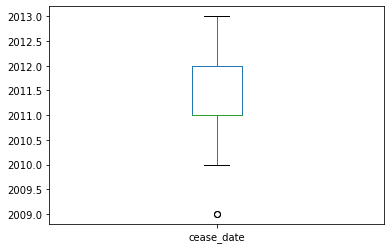

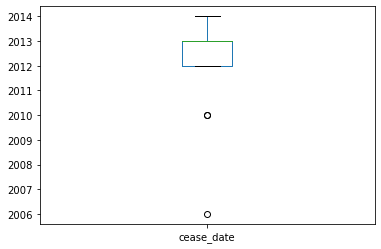

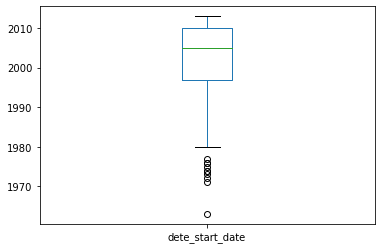

In [21]:
tafe_resignations.plot(y='cease_date', kind='box', )
dete_resignations.plot(y='cease_date', kind='box', )
dete_resignations.plot(y='dete_start_date', kind='box', )

### Calculate the years of server for the DETE dataset.  The TAFE Dataset already contains this data.

In [22]:
dete_resignations['institute_service'] = dete_resignations['cease_date'] - dete_resignations['dete_start_date']


### Create a column to make employees as leaving because of dissatisfaction

If an employee marks any of the below columns as reason for leaving we will make them as dissatisfied:

##### tafe_resignations:  
- Contributing Factors. Dissatisfaction  
- Contributing Factors. Job Dissatisfaction  


##### dete_resignations:  
- job_dissatisfaction  
- dissatisfaction_with_the_department  
- physical_work_environment  
- lack_of_recognition  
- lack_of_job_security  
- work_location  
- employment_conditions  
- work_life_balance  
- workload  

In [23]:
tafe_resignations['Contributing Factors. Job Dissatisfaction'].value_counts(dropna=False)

-                      270
Job Dissatisfaction     62
NaN                      8
Name: Contributing Factors. Job Dissatisfaction, dtype: int64

In [24]:
def update_col(x):
    if x == '-':
        return False
    elif pd.isnull(x):
        return np.nan
    else:
        return True    
    
tafe_resignations['dissatisfied'] = tafe_resignations[['Contributing Factors. Dissatisfaction', 
                                                       'Contributing Factors. Job Dissatisfaction']].applymap(update_col).any(1, skipna=False)


tafe_resignations_up = tafe_resignations.copy()



In [25]:
tafe_resignations_up['dissatisfied'].value_counts(dropna=False)
tafe_resignations_up.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 340 entries, 3 to 701
Data columns (total 24 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   id                                                   340 non-null    float64
 1   Institute                                            340 non-null    object 
 2   WorkArea                                             340 non-null    object 
 3   cease_date                                           335 non-null    float64
 4   separationtype                                       340 non-null    object 
 5   Contributing Factors. Career Move - Public Sector    332 non-null    object 
 6   Contributing Factors. Career Move - Private Sector   332 non-null    object 
 7   Contributing Factors. Career Move - Self-employment  332 non-null    object 
 8   Contributing Factors. Ill Health                     332 non-null    o

In [26]:
tafe_resignations_up[['Contributing Factors. Dissatisfaction', 
                    'Contributing Factors. Job Dissatisfaction', 
                      'dissatisfied']][tafe_resignations_up['dissatisfied'] != False].sort_values('dissatisfied')

,Contributing Factors. Dissatisfaction,Contributing Factors. Job Dissatisfaction,dissatisfied
14,Contributing Factors. Dissatisfaction,Job Dissatisfaction,True
508,-,Job Dissatisfaction,True
506,Contributing Factors. Dissatisfaction,-,True
478,-,Job Dissatisfaction,True
453,Contributing Factors. Dissatisfaction,Job Dissatisfaction,True
...,...,...,...
258,NaN,NaN,NaN
276,NaN,NaN,NaN
437,NaN,NaN,NaN
513,NaN,NaN,NaN


In [27]:
dete_resignations['dissatisfied'] = dete_resignations[['job_dissatisfaction',
                                                       'dissatisfaction_with_the_department', 
                                                       'physical_work_environment',
                                                       'lack_of_job_security', 
                                                       'work_location',
                                                       'employment_conditions', 
                                                       'work_life_balance',
                                                       'workload']].any(1, skipna=False)
dete_resignations_up = dete_resignations.copy()

In [28]:
print(dete_resignations_up['dissatisfied'].value_counts(dropna=False))

False    170
True     141
Name: dissatisfied, dtype: int64


In [29]:
# pd.set_option('display.max_rows', tafe_resignations.shape[0]+1)
# print(tafe_resignations[['Contributing Factors. Dissatisfaction','dissatisfied']])

#### Combine TAFE and DETE data

In [30]:
dete_resignations_up['institute'] = 'DETE'
tafe_resignations_up['institute'] = 'TAFE'

In [31]:
combined  = pd.concat([dete_resignations_up, tafe_resignations_up])

combined.head()

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,Contributing Factors. Dissatisfaction,Contributing Factors. Job Dissatisfaction,Contributing Factors. Interpersonal Conflict,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,role_service
3,4.0,Resignation-Other reasons,2012.0,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,6.0,Resignation-Other reasons,2012.0,1994.0,1997.0,Guidance Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,9.0,Resignation-Other reasons,2012.0,2009.0,2009.0,Teacher,Secondary,North Queensland,NaN,Permanent Full-time,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,10.0,Resignation-Other employer,2012.0,1997.0,2008.0,Teacher Aide,NaN,NaN,NaN,Permanent Part-time,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,12.0,Resignation-Move overseas/interstate,2012.0,2009.0,2009.0,Teacher,Secondary,Far North Queensland,NaN,Permanent Full-time,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
combined_updated = combined.dropna(axis=1, thresh=500).copy()
combined_updated

,id,separationtype,cease_date,position,employment_status,gender,age,institute_service,dissatisfied,institute
3,4.000000e+00,Resignation-Other reasons,2012.0,Teacher,Permanent Full-time,Female,36-40,7,False,DETE
5,6.000000e+00,Resignation-Other reasons,2012.0,Guidance Officer,Permanent Full-time,Female,41-45,18,True,DETE
8,9.000000e+00,Resignation-Other reasons,2012.0,Teacher,Permanent Full-time,Female,31-35,3,False,DETE
9,1.000000e+01,Resignation-Other employer,2012.0,Teacher Aide,Permanent Part-time,Female,46-50,15,True,DETE
11,1.200000e+01,Resignation-Move overseas/interstate,2012.0,Teacher,Permanent Full-time,Male,31-35,3,False,DETE
...,...,...,...,...,...,...,...,...,...,...
696,6.350660e+17,Resignation,2013.0,Operational (OO),Temporary Full-time,Male,21 25,5-6,False,TAFE
697,6.350668e+17,Resignation,2013.0,Teacher (including LVT),Temporary Full-time,Male,51-55,1-2,False,TAFE
698,6.350677e+17,Resignation,2013.0,NaN,NaN,NaN,NaN,NaN,False,TAFE
699,6.350704e+17,Resignation,2013.0,Teacher (including LVT),Permanent Full-time,Female,51-55,5-6,False,TAFE


### Clean up insitute_service column

The institute_service column needs to be standardized so that we can alayze the data.  We will convert it buy the following standards:

New: Less than 3 years at a company  
Experienced: 3-6 years at a company  
Established: 7-10 years at a company  
Veteran: 11 or more years at a company  

In [33]:
combined_updated['institute_service_2'] = combined_updated['institute_service'].astype('str').str.split('-').str[-1]
combined_updated['institute_service_2'] = combined_updated['institute_service_2'].str.replace('More than 20 years','20')
combined_updated['institute_service_2'] = combined_updated['institute_service_2'].str.replace('Less than 1 year','1')
combined_updated['institute_service_2'] = combined_updated['institute_service_2'].astype('float')
combined_updated['institute_service_2'].value_counts()

1.0     95
4.0     79
2.0     78
6.0     50
20.0    43
10.0    27
5.0     23
3.0     20
0.0     20
9.0     14
7.0     13
13.0     8
8.0      8
15.0     7
17.0     6
12.0     6
14.0     6
22.0     6
16.0     5
18.0     5
11.0     4
24.0     4
23.0     4
39.0     3
19.0     3
21.0     3
32.0     3
28.0     2
36.0     2
25.0     2
30.0     2
26.0     2
29.0     1
38.0     1
42.0     1
27.0     1
41.0     1
35.0     1
49.0     1
34.0     1
33.0     1
31.0     1
Name: institute_service_2, dtype: int64

In [34]:
def categorize_service_years(x):
    if pd.isnull(x):
        return np.nan
    elif x < 3:
        return 'New'
    elif x < 7:
        return 'Experienced'
    elif x < 11:
        return 'Established'
    else:
        return 'Veteran'

In [35]:
combined_updated['service_cat'] = combined_updated['institute_service_2'].apply(categorize_service_years)
combined_updated['service_cat'].value_counts()

New            193
Experienced    172
Veteran        136
Established     62
Name: service_cat, dtype: int64

### Perform some initial analysis

In [36]:
combined_updated['dissatisfied'].value_counts(dropna=False)

False    411
True     232
NaN        8
Name: dissatisfied, dtype: int64

In [40]:
combined_updated['dissatisfied'] = combined_updated['dissatisfied'].fillna(False)

In [41]:
combined_updated['dissatisfied'].value_counts(dropna=False)

False    419
True     232
Name: dissatisfied, dtype: int64

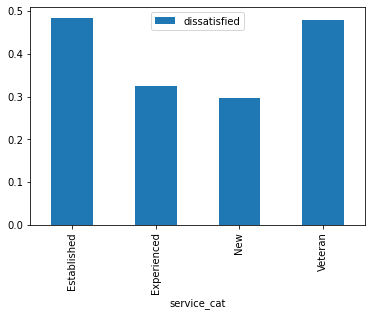

In [49]:
means = pd.pivot_table(combined_updated, index='service_cat', values='dissatisfied')
means.plot(kind='bar')

Based on this graph (and a small amount of analysis), the longer you have been employed, the more likely you are dissatified with the job when you leave.  More analysis would need to be done to figure out if there is a pattern in why employees are dissatified and if they are leaving for just that reason.